In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [27]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(data.head())
data.info()

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

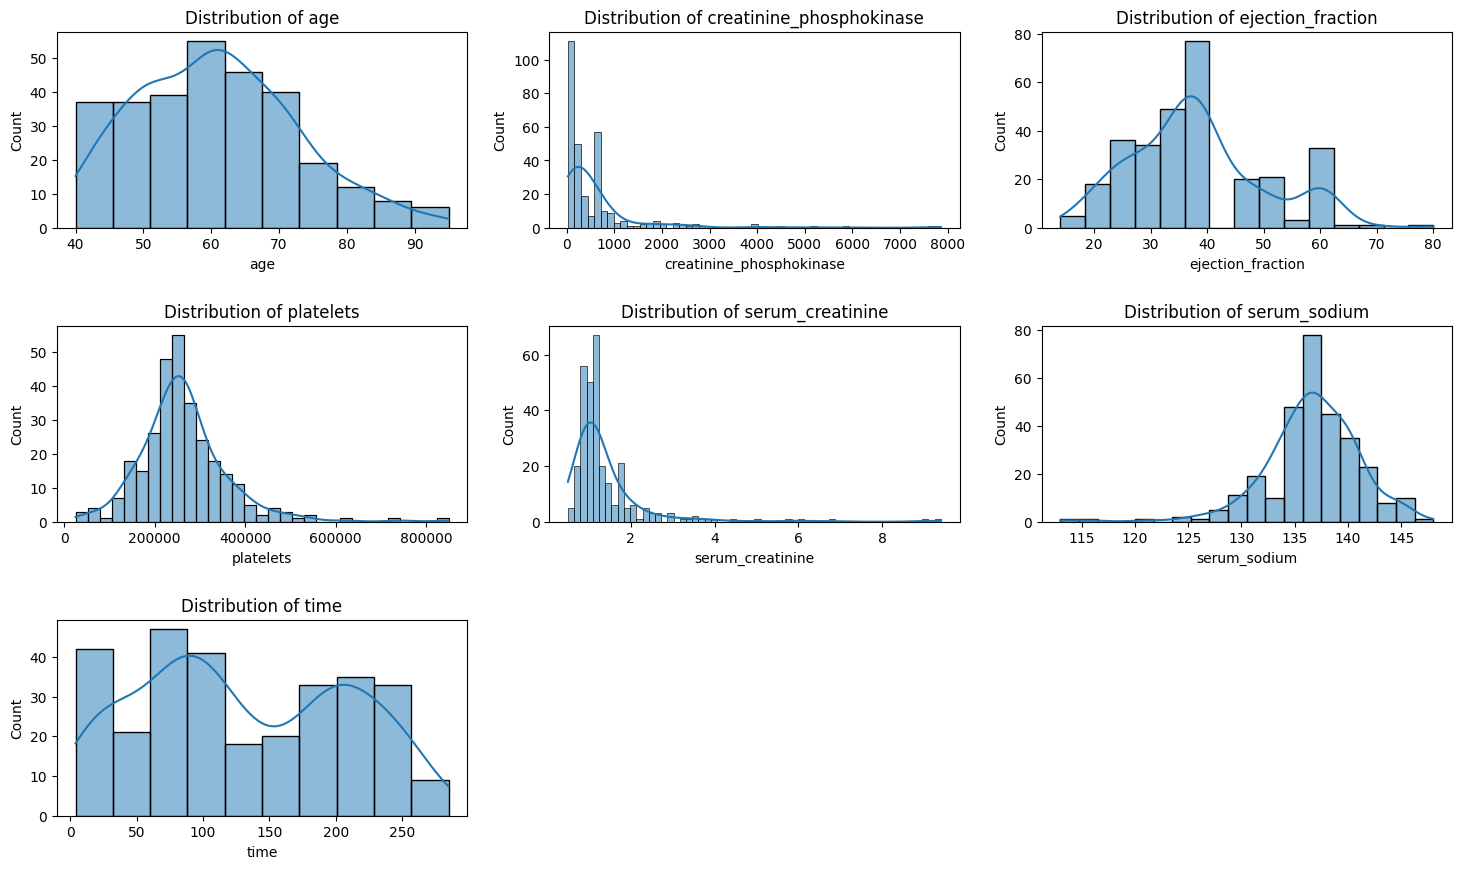

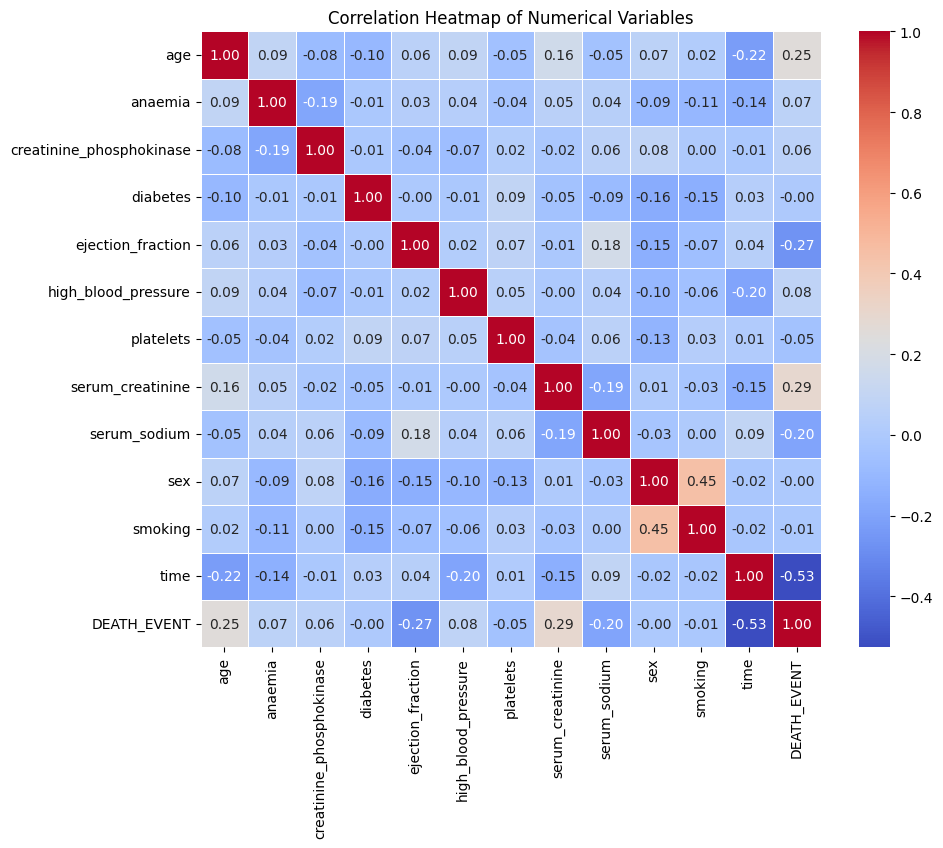

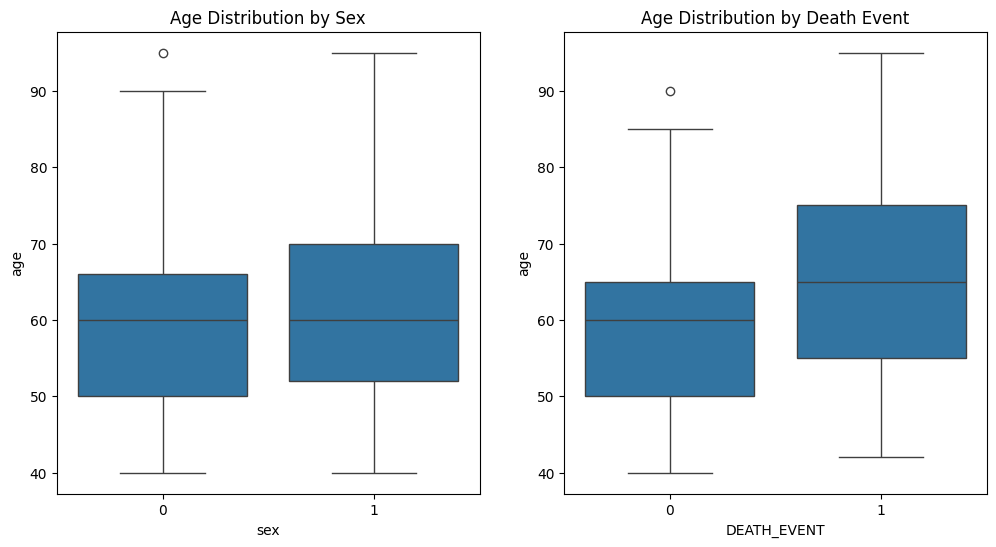

In [28]:
plt.figure(figsize=(18, 14))
plt.subplots_adjust(hspace=0.5)


# Plot histograms for numerical variables
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for i, var in enumerate(numerical_vars, start=1):
    plt.subplot(4, 3, i)  # Changed the number of rows to 4
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.show()


# Visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Boxplot for categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='age', data=data)
plt.title('Age Distribution by Sex')

plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Age Distribution by Death Event')
plt.show()

In [29]:
max_clusters = 10  # Maximum number of clusters to consider
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmedoids.fit_predict(data)
    silhouette_avg = metrics.silhouette_score(data, cluster_labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2
print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 3


In [30]:
k=optimal_num_clusters
k_medoid=KMedoids(n_clusters=k).fit(data)
clusters=k_medoid.cluster_centers_
labels=k_medoid.labels_

print('Labels :' , labels)
print('Clusters :', clusters)

for j in range (k):
    for i in range (len(data)):
        if (labels[i]==j):
            print('Clusters',j,':patient ',i)

Labels : [0 0 1 1 2 1 1 2 0 2 2 0 1 0 2 1 0 1 0 1 0 0 0 2 0 1 1 0 1 1 0 2 2 0 1 0 0
 2 0 2 0 1 1 0 1 0 0 2 1 2 1 2 0 2 0 2 0 0 2 0 2 0 0 2 0 1 1 0 0 2 2 1 0 1
 0 1 2 0 0 2 0 0 1 1 0 2 1 0 0 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 2 0 0 0 2 0
 0 0 2 2 1 0 2 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 2 0 2 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 2 0 1 2 1 2 1 0 1 0 0 0 2 1 1 0 2 1 1 0 0 0 0 0 0 0
 2 1 2 1 0 2 0 0 1 1 0 0 0 0 0 1 2 0 1 0 2 0 1 0 0 2 1 2 0 0 1 2 1 0 2 0 1
 2 1 2 0 1 1 0 0 1 1 0 2 0 2 0 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 1 0 1 1 1 2 0 1 0 0 0 0 0 1 1 2 2 1 0 2 0 1 0 0 0 2 0 2 0 2 0 1 2 1 1 0
 2 1 2]
Clusters : [[5.50e+01 0.00e+00 7.48e+02 0.00e+00 4.50e+01 0.00e+00 2.63e+05 1.30e+00
  1.37e+02 1.00e+00 0.00e+00 8.80e+01 0.00e+00]
 [6.80e+01 1.00e+00 5.77e+02 0.00e+00 2.50e+01 1.00e+00 1.66e+05 1.00e+00
  1.38e+02 1.00e+00 0.00e+00 4.30e+01 1.00e+00]
 [5.50e+01 0.00e+00 5.82e+02 1.00e+00 3.50e+01 1.00e+00 3.71e+05 7.00e-01
  1.40e+02 0.00e+00 0.00e+00 1.97e+02 0.00e+00]]
Clust

In [31]:
# Silhouette Score
silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(data, labels)

print("Silhouette Score:", silhouette_score)
print("Calinski-Harabasz Index:", calinski_harabasz_score)
print("Davies-Bouldin Index:", davies_bouldin_score)


Silhouette Score: 0.5250994488347147
Calinski-Harabasz Index: 353.21843309152115
Davies-Bouldin Index: 0.5940592147925868


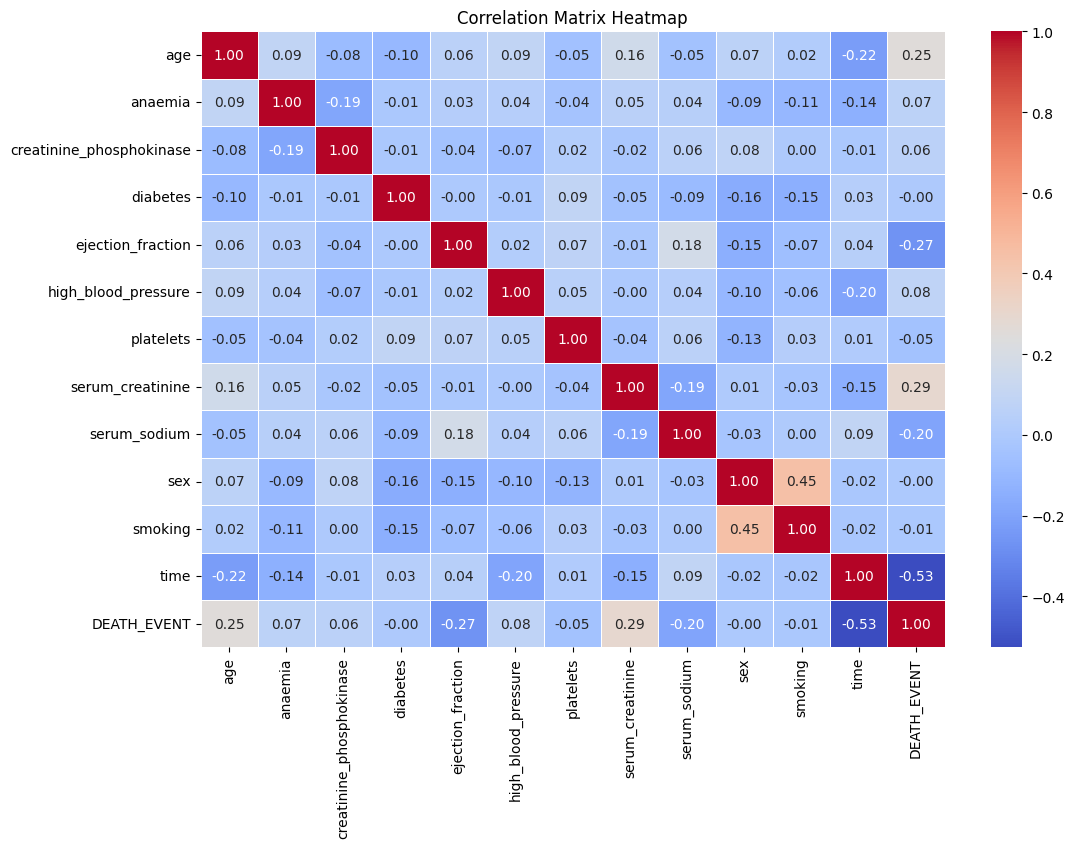

In [32]:

# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


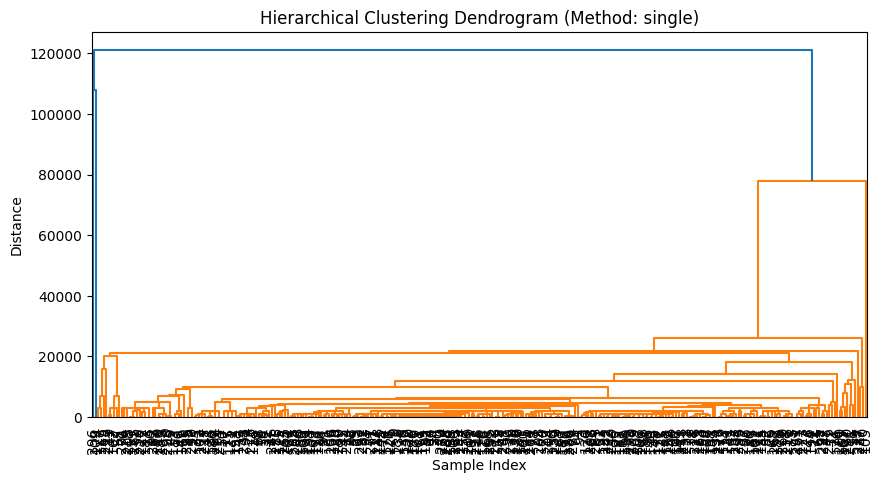

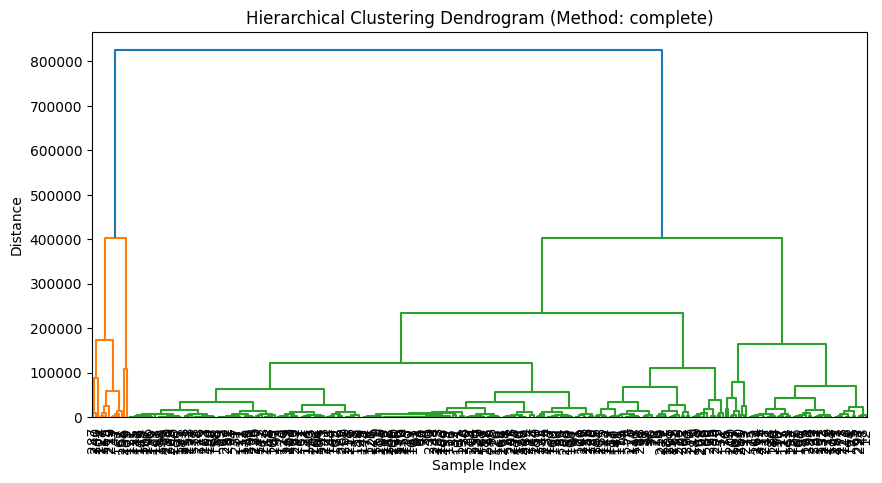

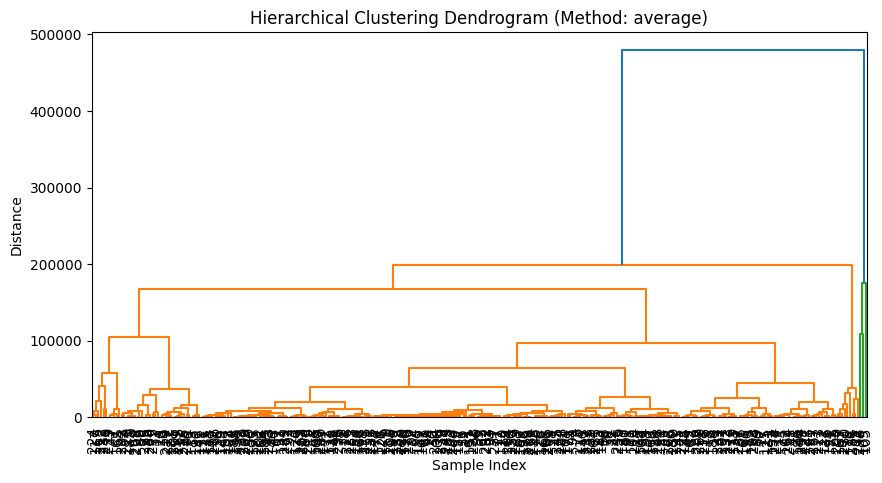

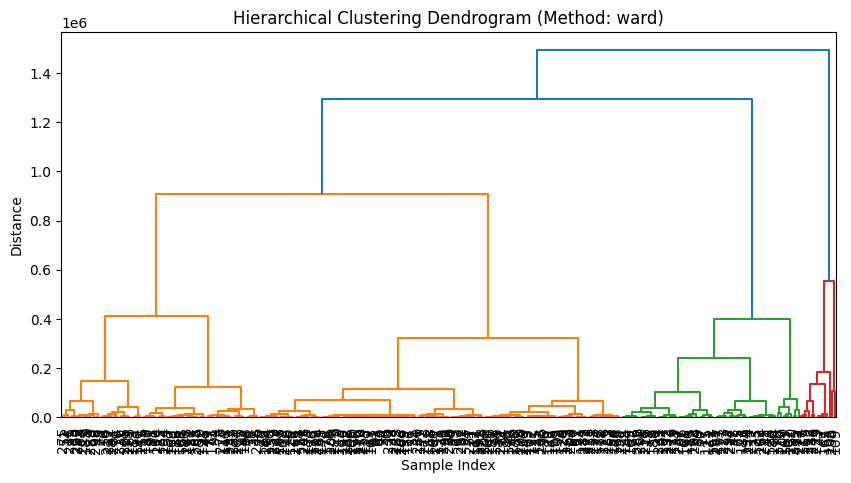

Best linkage method: single
Silhouette score: 0.7777189594325222


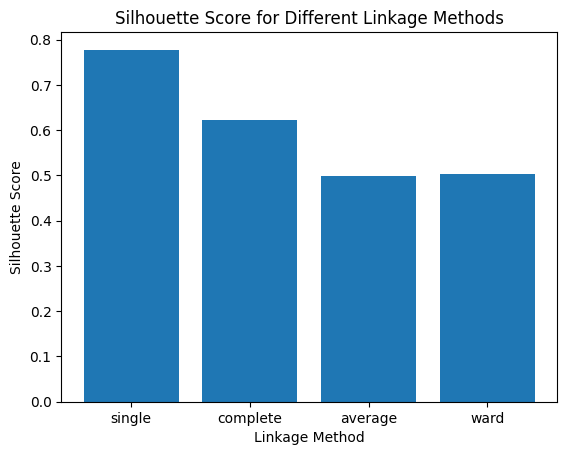

In [34]:
linkage_methods = ['single', 'complete', 'average', 'ward']
def cluster_and_score(X, linkage_method):
    Z = linkage(X, method=linkage_method,metric='euclidean')
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram (Method: {})'.format(linkage_method))
    dendrogram(Z,orientation='top',distance_sort='descending',leaf_font_size=10)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    cluster_labels = fcluster(Z, optimal_num_clusters, criterion='maxclust')  # You can adjust the number of clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    return silhouette_avg

# Test each linkage method
silhouette_scores = {}
for method in linkage_methods:
    silhouette_scores[method] = cluster_and_score(data, method)

# Find the best linkage method
best_linkage_method = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_linkage_method]

print("Best linkage method:", best_linkage_method)
print("Silhouette score:", best_score)

# Plot the silhouette scores
plt.bar(range(len(silhouette_scores)), list(silhouette_scores.values()), align='center')
plt.xticks(range(len(silhouette_scores)), list(silhouette_scores.keys()))
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Linkage Methods')
plt.show()